<a href="https://colab.research.google.com/github/mahoangnhatphi/prj/blob/main/app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 0: Import Datasets

In [30]:
# Install kaggle
!pip install kaggle

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import os
# Cấu hình secret key để xác thực truy cập đến Kaggle trên môi trường
os.environ['KAGGLE_USERNAME'] = 'phimhongnht'
os.environ['KAGGLE_KEY'] = '9a66e2c809122b723bbd83a30e78c0ca'

if not os.path.exists('./kaggle/data'):
  !kaggle datasets download -d phimhongnht/dog-breeds -p ./
  !unzip  ./*.zip -d ./kaggle
else:
    print('File already exists, no need to download or unzip.')

print(os.listdir('./kaggle'))

Streaming output truncated to the last 5000 lines.
  inflating: ./kaggle/data/test/Curly Retriever/n02099429_448.jpg  
  inflating: ./kaggle/data/test/Curly Retriever/n02099429_569.jpg  
  inflating: ./kaggle/data/test/Curly Retriever/n02099429_618.jpg  
  inflating: ./kaggle/data/test/Curly Retriever/n02099429_817.jpg  
  inflating: ./kaggle/data/test/Curly Retriever/n02099429_853.jpg  
  inflating: ./kaggle/data/test/Curly Retriever/n02099429_910.jpg  
  inflating: ./kaggle/data/test/Dachshund/Daschund-2.jpg  
  inflating: ./kaggle/data/test/Dachshund/Dash_Dachshund_With_Hat.jpg  
  inflating: ./kaggle/data/test/Dachshund/Standard_Wire-hair_Dachshund.jpg  
  inflating: ./kaggle/data/test/Dachshund/Stretched_Dachshund.jpg  
  inflating: ./kaggle/data/test/Dachshund/dachshund-1920_640.jpg  
  inflating: ./kaggle/data/test/Dachshund/dachshund-3.jpg  
  inflating: ./kaggle/data/test/Dachshund/dachshund-5.jpg  
  inflating: ./kaggle/data/test/Dachshund/dachshund-6.jpg  
  inflating: ./kag

In [32]:
import numpy as np
from glob import glob

# load filenames for dog images
dog_files = np.array(glob("/content/kaggle/data/*/*/*"))

# print number of images in each dataset
print('There are %d total dog images.' % len(dog_files))

There are 5724 total dog images.


In [1]:
# %%time
# # https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
# # https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip

# import requests, zipfile, io, os, shutil

# root = '/content'
# dogimages_url = "https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip"
# humanimages_url = "https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip"

# data_path = os.path.join(root,'data')
# dogimages_path = os.path.join(data_path,'dogImages')
# humanimages_path = os.path.join(data_path,'lfw')
# data_path = os.path.join(root,'data')
# if not os.path.exists(data_path): os.mkdir(data_path)

# # if os.path.exists(dogimages_path):shutil.rmtree(dogimages_path)
# # if os.path.exists(humanimages_path):shutil.rmtree(humanimages_path)

# if not os.path.exists(dogimages_path):
#   print("downloading dog images")
#   r = requests.get(dogimages_url)
#   z = zipfile.ZipFile(io.BytesIO(r.content))
#   z.extractall(data_path)

# if not os.path.exists(humanimages_path):
#   print("downloading human images")
#   r = requests.get(humanimages_url)
#   z = zipfile.ZipFile(io.BytesIO(r.content))
#   z.extractall(data_path)

# import numpy as np
# from glob import glob

# # load filenames for human and dog images
# human_files = np.array(glob("/content/data/lfw/*/*"))
# dog_files = np.array(glob("/content/data/dogImages/*/*/*"))

# # print number of images in each dataset
# print('There are %d total human images.' % len(human_files))
# print('There are %d total dog images.' % len(dog_files))

downloading dog images
downloading human images
There are 13233 total human images.
There are 8351 total dog images.
CPU times: user 14.4 s, sys: 7.04 s, total: 21.4 s
Wall time: 53.3 s


In [2]:
if not os.path.exists('/content/haarcascades'): os.mkdir('/content/haarcascades')
haarcascades_url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml'
!wget -O /content/haarcascades/haarcascade_frontalface_alt.xml {haarcascades_url}

--2023-09-02 11:28:42--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 676709 (661K) [text/plain]
Saving to: ‘/content/haarcascades/haarcascade_frontalface_alt.xml’

/content/haarcascad 100%[===================>] 660.85K  --.-KB/s    in 0.05s   

2023-09-02 11:28:43 (12.7 MB/s) - ‘/content/haarcascades/haarcascade_frontalface_alt.xml’ saved [676709/676709]



Step 1: Detect Dogs

In [ ]:
# Write a Dog Detector

In [33]:
#Obtain Pre-trained VGG-16 Model
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [34]:
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import os

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to
    predicted ImageNet class for image at specified path

    Args:
        img_path: path to an image

    Returns:
        Index corresponding to VGG-16 model's prediction
    '''

    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image

    # data transformation
    batch_size = 64
    img = Image.open(img_path).convert('RGB')
    image_transforms = transforms.Compose([
                            transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
                            transforms.RandomRotation(degrees=15),
                            transforms.ColorJitter(),
                            transforms.RandomHorizontalFlip(),
                            transforms.CenterCrop(size=224),  # Image net standards
                            transforms.ToTensor(),
                            transforms.Normalize([0.485, 0.456, 0.406],
                                                 [0.229, 0.224, 0.225])  # Imagenet standards
                        ])

    image = image_transforms(img)[:3,:,:].unsqueeze(0)
#     image = image_transforms(img)
#     print(image_transformation)

    if use_cuda:
        image = image.cuda()
    output = VGG16(image)

    _,pred = torch.max(output, dim=1)
    pred=pred.cpu()
    pred = pred.data.numpy()[0]

    return pred # predicted class index

VGG16_predict(dog_files[0])

181

In [35]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
#     in VGG16 index 151 to 268 are dog classifications

    return VGG16_predict(img_path)>= 151 and VGG16_predict(img_path)<=268 # true/false

print(dog_detector(dog_files[7]))

True


Assess the Dog Detector

In [36]:
# CNN
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_path = '/content/data/dogImages/train/'
val_path = '/content/data/dogImages/valid'
test_path = '/content/data/dogImages/test'

batch_size=64
train_generator = train_datagen.flow_from_directory(
        train_path,
        # '/content/cats_dogs/data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_path,
        # '/content/cats_dogs/data/val',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = val_datagen.flow_from_directory(
        test_path,
        # '/content/cats_dogs/data/val',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 6680 images belonging to 133 classes.
Found 835 images belonging to 133 classes.
Found 836 images belonging to 133 classes.


In [37]:
from time import time
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=( 150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(133))
model.add(Activation('softmax'))

In [38]:
# Specify Loss Function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Train and Validate the model

In [ ]:
start_time = time()
model.fit_generator(
        train_generator,
        #steps_per_epoch=18631 // batch_size,
        epochs=16,
        validation_data=validation_generator,
        #validation_steps=10119 // batch_size
        )
model.save_weights('first_try.h5')

print('time taken ',time()-start_time)

<ipython-input-39-919974f827fb>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/16
 49/105 [=============>................] - ETA: 4:32 - loss: 4.8946 - accuracy: 0.0057

Test the Model

In [ ]:
# test_prediction = model.predict(test_generator)
model.metrics_names

In [ ]:
# from sklearn.metrics import accuracy_score
# model.evaluate_generator(test_generator)
test_generator.reset()
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_eval = model.evaluate_generator(test_generator,STEP_SIZE_TEST)
print('test loss ',test_eval[0])
print('test accuracy ',test_eval[1])

CNN to classfiy dog breeds

In [4]:
## TODO: Specify data loaders
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_path = '/content/data/dogImages/train/'
val_path = '/content/data/dogImages/valid'
test_path = '/content/data/dogImages/test'

batch_size=64
train_generator = train_datagen.flow_from_directory(
        train_path,
        # '/content/cats_dogs/data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_path,
        # '/content/cats_dogs/data/val',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = val_datagen.flow_from_directory(
        test_path,
        # '/content/cats_dogs/data/val',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 6680 images belonging to 133 classes.
Found 835 images belonging to 133 classes.
Found 836 images belonging to 133 classes.


In [5]:
from time import time
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from keras.applications.vgg16 import VGG16 as PTModel, preprocess_input
import keras
keras.backend.set_learning_phase(1)

img_rows, img_cols, img_channel = 150, 150, 3
base_model = PTModel(weights='imagenet'
                     ,include_top=False, input_shape=(img_rows, img_cols, img_channel), classes = 2)
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(64, activation='relu'))
add_model.add(Dense(133, activation='sigmoid'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))

for layer in base_model.layers:
    layer.trainable = False

    if layer.name.startswith('bn'):
        layer.call(layer.input, training=False)

/usr/local/lib/python3.10/dist-packages/keras/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


58889256/58889256 [==============================] - 0s 0us/step


In [6]:
model.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
check_point_name = 'vgg16.model'
model_weights = 'vgg16.h5'

start_time = time()
model.fit_generator(
        train_generator,
        epochs=2,
        validation_data=validation_generator,
        #class_weight = class_weights,
        callbacks=[ModelCheckpoint(check_point_name, monitor='val_acc', save_best_only=True)])
model.save_weights(model_weights)

print('time taken ',time()-start_time)

<ipython-input-7-89b5a1d2250c>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/2
105/105 [==============================] - ETA: 0s - loss: 0.6543 - accuracy: 0.0076 

105/105 [==============================] - 1828s 17s/step - loss: 0.6543 - accuracy: 0.0076 - val_loss: 0.6355 - val_accuracy: 0.0084
Epoch 2/2
105/105 [==============================] - ETA: 0s - loss: 0.6241 - accuracy: 0.0096 

105/105 [==============================] - 1772s 17s/step - loss: 0.6241 - accuracy: 0.0096 - val_loss: 0.6131 - val_accuracy: 0.0096
time taken  3706.4570791721344


In [13]:
# test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)
test_generator.reset()
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_eval = model.evaluate_generator(test_generator,STEP_SIZE_TEST)
print('test loss ',test_eval[0])
print('test accuracy ',test_eval[1])

<ipython-input-13-58b79be3ab5f>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_eval = model.evaluate_generator(test_generator,STEP_SIZE_TEST)


test loss  0.613106369972229
test accuracy  0.0072115384973585606


In [14]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
# class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
from PIL import Image
import numpy as np
from skimage import transform

def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (150, 150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
  image = load(img_path)
  y_prob = model.predict(image)
  y_class = y_prob.argmax(axis=-1)
  # print(y_classes)
  labels = (train_generator.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  prediction = [labels[k] for k in y_class]
  return prediction

Write your Algorithm

In [21]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def run_app(img_path):
    img = mpimg.imread(img_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # This removes axis labels and ticks
    plt.show()
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path):
      print('This is image of dog')

      prediction = predict_breed_transfer(img_path)
      print(prediction)
    else:
      print("couldn't detect dog or human image")



In [19]:
dog_files[:3]

array(['/content/data/dogImages/test/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03241.jpg',
       '/content/data/dogImages/test/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03202.jpg',
       '/content/data/dogImages/test/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03200.jpg'],
      dtype='<U113')

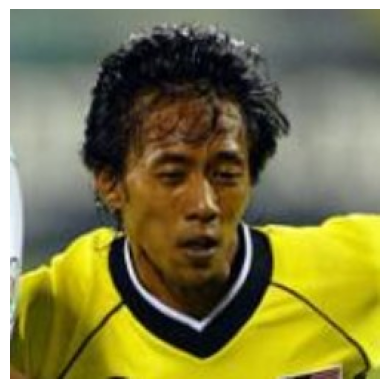

NameError: ignored

In [22]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)